In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('breast-level_annotations.csv')

In [8]:
train_data = data[data['split'] == 'training']
test_data = data[data['split'] == 'test']

In [9]:
train_data.to_csv('train_split.csv', index=False)
test_data.to_csv('test_split.csv', index=False)

In [10]:
metadata = pd.read_csv('metadata.csv')

In [11]:
# Identify the common column in both dataframes
common_column = 'image_id'

merged_df = pd.merge(data, metadata, on=common_column)


merged_df.to_csv('merged_file.csv', index=False)

In [12]:
train_data = merged_df[merged_df['split'] == 'training']
test_data = merged_df[merged_df['split'] == 'test']
train_data.to_csv('train_split.csv', index=False)
test_data.to_csv('test_split.csv', index=False)

In [14]:

from sklearn.model_selection import train_test_split
df = train_data
column_samples = []
for column in ['breast_birads', 'breast_density', 'Manufacturer']:
    column_samples.append(df[df[column].notnull()])


combined_df = pd.concat(column_samples)


train_study_ids = set()
for column in ['breast_birads', 'breast_density', 'Manufacturer']:
    unique_study_ids = combined_df[combined_df[column].notnull()]['study_id'].unique()
    train_ids, _ = train_test_split(unique_study_ids, test_size=0.15, random_state=42)
    train_study_ids.update(train_ids)


train_df = df[df['study_id'].isin(train_study_ids)]
val_df = df[~df['study_id'].isin(train_study_ids)]


train_df.to_csv('train.csv', index=False)
val_df.to_csv('validation.csv', index=False)

In [15]:
patients_train = train_df['study_id'].tolist()
patients_valid = val_df['study_id'].tolist()

In [16]:
for ind, value in enumerate(patients_train):
    if value in patients_valid:
        print('Leakage in patient :', value)

In [19]:
import matplotlib.pyplot as plt

def plot_distribution(data):
    plt.hist(data, bins='auto')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of List Elements')

    counts, bins, patches = plt.hist(data, bins='auto', alpha=0.7)
    total_samples = len(data)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    for count, x in zip(counts, bin_centers):
        if count > 0:
            percentage = count / total_samples * 100
            plt.text(x, count + 1, f'{int(count)}\n{percentage:.1f}%', ha='center')

    plt.text(0.5, 0.95, f'Total Samples: {total_samples}', transform=plt.gca().transAxes,
             horizontalalignment='center', bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7))

    plt.show()


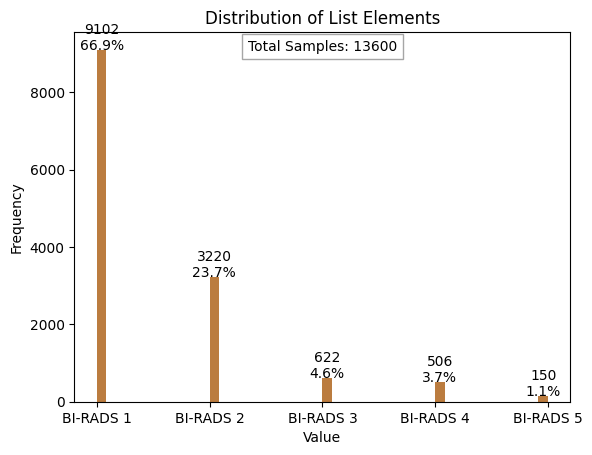

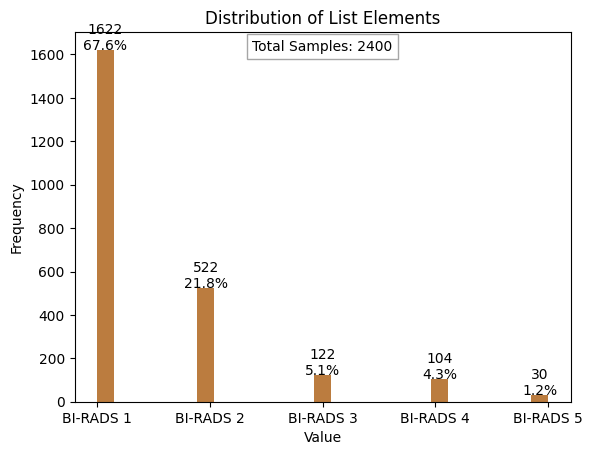

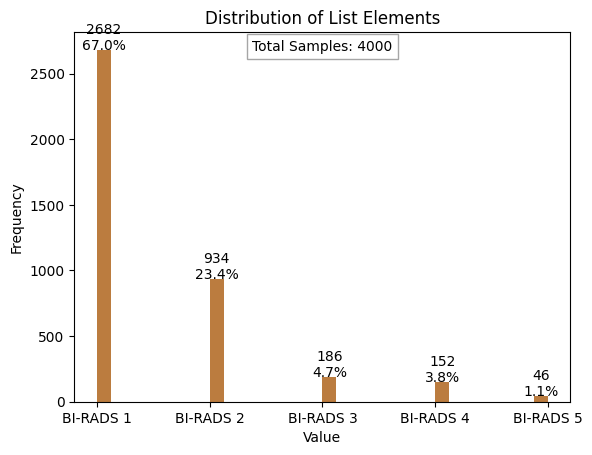

In [21]:
birads_train = train_df['breast_birads'].tolist()
birads_valid = val_df['breast_birads'].tolist()
birads_test = test_data['breast_birads'].tolist()

plot_distribution(sorted(birads_train))
plot_distribution(sorted(birads_valid))
plot_distribution(sorted(birads_test))                  

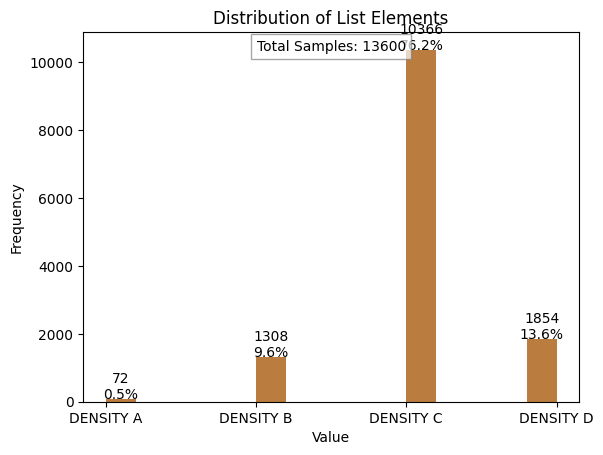

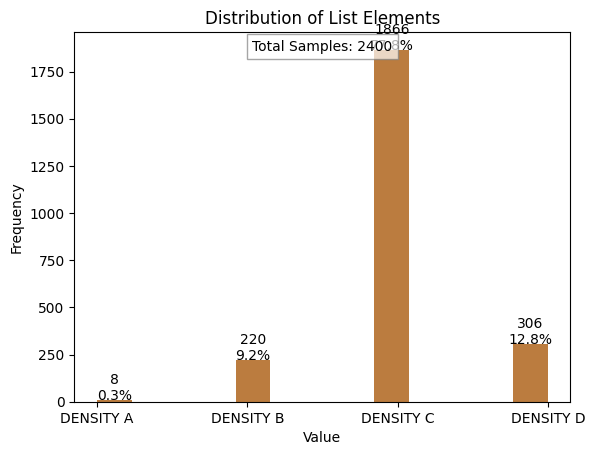

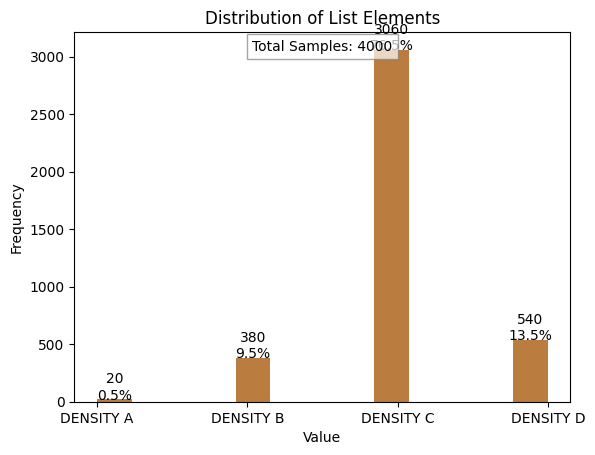

In [22]:
birads_train = train_df['breast_density'].tolist()
birads_valid = val_df['breast_density'].tolist()
birads_test = test_data['breast_density'].tolist()

plot_distribution(sorted(birads_train))
plot_distribution(sorted(birads_valid))
plot_distribution(sorted(birads_test))      

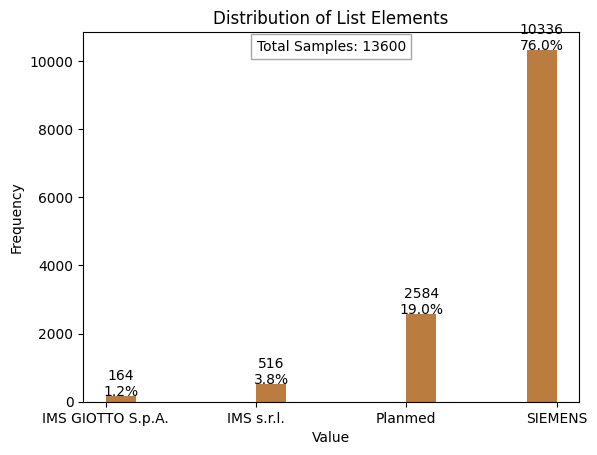

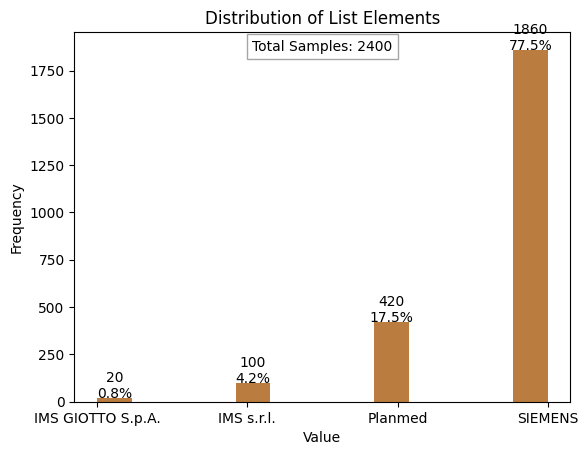

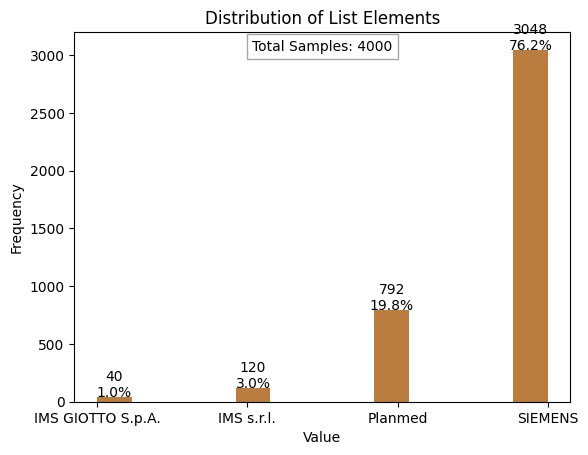

In [23]:
birads_train = train_df['Manufacturer'].tolist()
birads_valid = val_df['Manufacturer'].tolist()
birads_test = test_data['Manufacturer'].tolist()

plot_distribution(sorted(birads_train))
plot_distribution(sorted(birads_valid))
plot_distribution(sorted(birads_test))  